In [18]:
#Import packages
import pandas as pd
import numpy as np
import pandas_dedupe
from collections import OrderedDict
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import networkx as nx

plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [22]:
df = pd.read_csv('SW_Boggis_english_part2.csv')

In [23]:
#drop null values (i.e. any rows of text that are not talkwall actions)
df.dropna(inplace=True)

In [33]:
df.columns

Index(['Speaker ', 'Text', 'Act'], dtype='object')

In [34]:
df['Speaker ']

8            Noedgeo
10     F&E&L group 3
20            Torami
23            Torami
48           Noedgeo
           ...      
372          Group 2
373          Group 2
374          Group 2
375          Group 2
376          Group 2
Name: Speaker , Length: 161, dtype: object

In [35]:
#create a unique id for each name
list_ids = [{v: k for k, v in enumerate(
   OrderedDict.fromkeys(df['Speaker ']))}
      [n] for n in df['Speaker ']]

In [36]:
#create a column with the name id's
df['name_id'] = list_ids

In [41]:
df

,Speaker,Text,Act,name_id
8,Noedgeo,Slothful,Create Message,0
10,F&E&L group 3,They are related,Create Message,1
20,Torami,Resilient,Create Message,2
23,Torami,Family,Create Message,2
48,Noedgeo,Slothful because Stanley wasn't able to dig a ...,Edit Message,0
...,...,...,...,...
372,Group 2,Stanley on they other hand is determined to di...,Move Message,3
373,Group 2,Stanley on they other hand is determined to di...,Move Message,3
374,Group 2,Thoughtful because he was sad that he didn't k...,Move Message,3
375,Group 2,Stanley on they other hand is determined to di...,Move Message,3


In [44]:
# create clusters of text that are the same or slight variations of one text statement
df_clusters_SW_Boggis = pandas_dedupe.dedupe_dataframe(df,['Text'])

Importing data ...


Text : adaptable because stanley continued to dig the hole although he had blisters and elya continued to carry the pig up the mountaingreen

Text : adaptable because stanley continued to dig the hole although he had blisters and elya continued to carry the pig up the mountain

0/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished


Starting active labeling...
y


Text : stanley is independent beacuse because he carried digging the hole without stopping and got blisters all over his hands

Text : stanley is independent beacuse because he carried digging the hole without stopping and got blisters all over his hands orange

1/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : they are both related to each other because they came from the same family

Text : they are both related to each other because they came from the same family orange

2/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : stanley on they other hand is determined to dig a hole

Text : stanley on they other hand is determined to dig a hole and he never gave up when he had millions of blisters on his hand.green

3/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : stanley on they other hand is determined to dig a hole

Text : slothful because stanley wasnt able to dig a hole properly and elya couldnt be bothered to take the pig up the mountain for the last time.

4/10 positive, 0/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


Text : slothful because stanley wasnt able to dig a hole properly and elya couldnt be bothered to take the pig up the mountain for the last time.

Text : stanley on they other hand is determined to dig a hole

4/10 positive, 1/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


Text : stanley on they other hand is determined to dig a hole

Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

4/10 positive, 2/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


Text : they are both related to each other because they came from the same family orange

Text : they are both different because elya is forgetful and stanley is focused , stanley is focused on his task but elya forgot her promise

4/10 positive, 3/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


Text : adaptable because stanley continued to dig the hole although he had blisters and elya continued to carry the pig up the mountain

Text : green we think there both determined because stanley was determined to dig the hole and elya was determined to get the pig up the mountain.

4/10 positive, 4/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


Text : they are both determined because he wants to take myras hand in marriage and also to find madame zoroine son.

Text : they are both determined because he wants to take myras hand in marriage and also to find madame zoroine son.

4/10 positive, 5/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

5/10 positive, 5/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : they are related

Text : they are related

6/10 positive, 5/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : adaptable because stanley continued to dig the hole although he had blisters and elya continued to carry the pig up the mountain

Text : green we think there both determined because stanley was determined to dig the hole and elya was determined to get the pig up the mountain.

7/10 positive, 5/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : green we think there both determined because stanley was determined to dig the hole and elya was determined to get the pig up the mountain.

Text : they are both determined because he wants to take myras hand in marriage and also to find madame zoroine son.

8/10 positive, 5/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


Text : they are both determined because he wants to take myras hand in marriage and also to find madame zoroine son.

Text : green we think there both determined because stanley was determined to dig the hole and elya was determined to get the pig up the mountain.

8/10 positive, 6/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


Text : they are both related to each other because they came from the same family

Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

8/10 positive, 7/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


Text : stanley is independent beacuse because he carried digging the hole without stopping and got blisters all over his hands

Text : they are both related to each other because they came from the same family

8/10 positive, 8/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


Text : they are both different because elya is forgetful and stanley is focused , stanley is focused on his task but elya forgot her promise

Text : they are both determined because he wants to take myras hand in marriage and also to find madame zoroine son.

8/10 positive, 9/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


Text : they are both related to each other because they came from the same family orange

Text : they are both related to each other because they came from the same family orange

8/10 positive, 10/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : they are both related to each other because they came from the same family orange

Text : they are both related to each other because they came from the same family orange

9/10 positive, 10/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

10/10 positive, 10/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

11/10 positive, 10/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

12/10 positive, 10/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : guilty because he didnt carrie madame zoroni up the mountion to drink the walter from tha lake

Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

13/10 positive, 10/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

Text : guilty because he didnt carrie madame zoroni up the mountion to drink the walter from tha lake

13/10 positive, 11/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


Text : slothful because stanley wasnt able to dig a hole properly and elya couldnt be bothered to take the pig up the mountain for the last time.

Text : slothful because stanley wasnt able to dig a hole properly and elya couldnt be bothered to take the pig up the mountain for the last time.

13/10 positive, 12/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : adaptable because stanley continued to dig the hole although he had blisters and elya continued to carry the pig up the mountain

Text : adaptable because stanley continued to dig the hole although he had blisters and elya continued to carry the pig up the mountain

14/10 positive, 12/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

15/10 positive, 12/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : adaptable because stanley continued to dig the hole although he had blisters and elya continued to carry the pig up the mountain

Text : adaptable because stanley continued to dig the hole although he had blisters and elya continued to carry the pig up the mountain

16/10 positive, 12/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : orange we think the difference between stanley and elya is because stanley was polite on the bus but elya had preserved through out

Text : orange we think the difference between stanley and elya is because stanley was polite on the bus but elya had preserved through out

17/10 positive, 12/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

18/10 positive, 12/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : stanley on they other hand is determined to dig a hole

Text : stanley on they other hand is determined to dig a hole

19/10 positive, 12/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : slothful because stanley wasnt able to dig a hole properly and elya couldnt be bothered to take the pig up the mountain for the last time.

Text : slothful because stanley wasnt able to dig a hole properly and elya couldnt be bothered to take the pig up the mountain for the last time.

20/10 positive, 12/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : they are both determined because he wants to take myras hand in marriage and also to find madame zoroine son.

Text : they are both determined because he wants to take myras hand in marriage and also to find madame zoroine son.

21/10 positive, 12/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

22/10 positive, 12/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

Text : they are both determined because he wants to take myras hand in marriage and also to find madame zoroine son.

23/10 positive, 12/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


Text : adaptable because stanley continued to dig the hole although he had blisters and elya continued to carry the pig up the mountain

Text : adaptable because stanley continued to dig the hole although he had blisters and elya continued to carry the pig up the mountain

23/10 positive, 13/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : they are both determined because he wants to take myras hand in marriage and also to find madame zoroine son.

Text : they are both determined because he wants to take myras hand in marriage and also to find madame zoroine son.

24/10 positive, 13/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : stanley on they other hand is determined to dig a hole and he never gave up when he had millions of blisters on his hand.green

Text : stanley on they other hand is determined to dig a hole and he never gave up when he had millions of blisters on his hand.green

25/10 positive, 13/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : they are both different because elya is forgetful and stanley is focused , stanley is focused on his task but elya forgot her promise

Text : they are both different because elya is forgetful and stanley is focused , stanley is focused on his task but elya forgot her promise

26/10 positive, 13/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : adaptable because stanley continued to dig the hole although he had blisters and elya continued to carry the pig up the mountain

Text : adaptable because stanley continued to dig the hole although he had blisters and elya continued to carry the pig up the mountain

27/10 positive, 13/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : adaptable because stanley continued to dig the hole although he had blisters and elya continued to carry the pig up the mountain

Text : adaptable because stanley continued to dig the hole although he had blisters and elya continued to carry the pig up the mountain

28/10 positive, 13/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

Text : thoughtful because he was sad that he didnt keep the promise (elya) and stanley didnt say im not guilty because he didnt want to annoy

29/10 positive, 13/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


y


Text : slothful because stanley wasnt able to dig a hole properly and elya couldnt be bothered to take the pig up the mountain for the last time.

Text : elya is stanley great-great-grandfather and also they are both independent because elya because he didnt listen to what other people say

30/10 positive, 13/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


Text : we think the difference between stanley and elya is because stanley was polite on the bus but elya had preserved through out

Text : adaptable because stanley continued to dig the hole although he had blisters and elya continued to carry the pig up the mountain

30/10 positive, 14/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


n


Text : elya is stanley great-great-grandfather and also they are both independent because elya because he didnt listen to what other people say

Text : adaptable because stanley continued to dig the hole although he had blisters and elya continued to carry the pig up the mountain

30/10 positive, 15/10 negative
Do these records refer to the same thing?
(y)es / (n)o / (u)nsure / (f)inished / (p)revious


f


Finished labeling


Clustering...
# duplicate sets 22


In [45]:
df_clusters_SW_Boggis

,Speaker,Text,Act,name_id,cluster id,confidence
8,noedgeo,slothful,create message,0,18,1.000000
10,fel group 3,they are related,create message,1,0,0.993950
20,torami,resilient,create message,2,1,0.993950
23,torami,family,create message,2,2,0.993950
48,noedgeo,slothful because stanley wasnt able to dig a h...,edit message,0,3,0.993950
...,...,...,...,...,...,...
372,group 2,stanley on they other hand is determined to di...,move message,3,7,0.992076
373,group 2,stanley on they other hand is determined to di...,move message,3,7,0.992076
374,group 2,thoughtful because he was sad that he didnt ke...,move message,3,8,0.993950
375,group 2,stanley on they other hand is determined to di...,move message,3,7,0.992076


In [47]:
#sort data frame in order of clusters identified in dedupe clustering algorithm
df_sorted = df_clusters_SW_Boggis.sort_values(by = ['cluster id'])
df_sorted

,Speaker,Text,Act,name_id,cluster id,confidence
10,fel group 3,they are related,create message,1,0,0.99395
111,teacher,they are related,delete message,4,0,0.99395
20,torami,resilient,create message,2,1,0.99395
103,teacher,resilient,delete message,4,1,0.99395
23,torami,family,create message,2,2,0.99395
...,...,...,...,...,...,...
329,torami,green we think there both determined because s...,move message,2,17,0.99395
8,noedgeo,slothful,create message,0,18,1.00000
288,teacher,teacher,select wall,4,19,1.00000
292,teacher,torami,select wall,4,20,1.00000


In [79]:
df_sorted['name_id'].unique()

array(['1', '4', '2', '5', '0', '3'], dtype=object)

In [85]:
df_sorted.name_id.astype(int)

10     1
111    4
20     2
103    4
23     2
      ..
329    2
8      0
288    4
292    4
298    4
Name: name_id, Length: 161, dtype: int64

In [93]:
df_sorted['name_id'] = df_sorted['name_id'].astype(int)

In [49]:
# add value of 6 to each cluster id to avoid duplicate node id's in network analysis
df_sorted['cluster id']+= 6

In [ ]:
#create a column with the name id's
df_sorted['name_id'] = list_ids

In [50]:
#create tuples of name id's and cluster id's which will be the edges in the network
df_sorted['tuple_edges'] = list(zip(df_sorted['cluster id'], df_sorted['name_id']))

In [51]:
add_nodes_from_list = df_sorted['cluster id'].tolist()
add_nodes_from_list2 = df_sorted['name_id'].tolist()

In [54]:
from networkx.algorithms import bipartite

B = nx.Graph()
# Add the node attribute "bipartite"
B.add_nodes_from(add_nodes_from_list, name = df_sorted['Speaker '], bipartite=0)
B.add_nodes_from(add_nodes_from_list2, bipartite=1)
B.add_edges_from(df_sorted['tuple_edges'])

In [55]:
labels = {}    
for node in B.nodes():
    #set the node name as the key and the label as its value 
    labels[node] = node

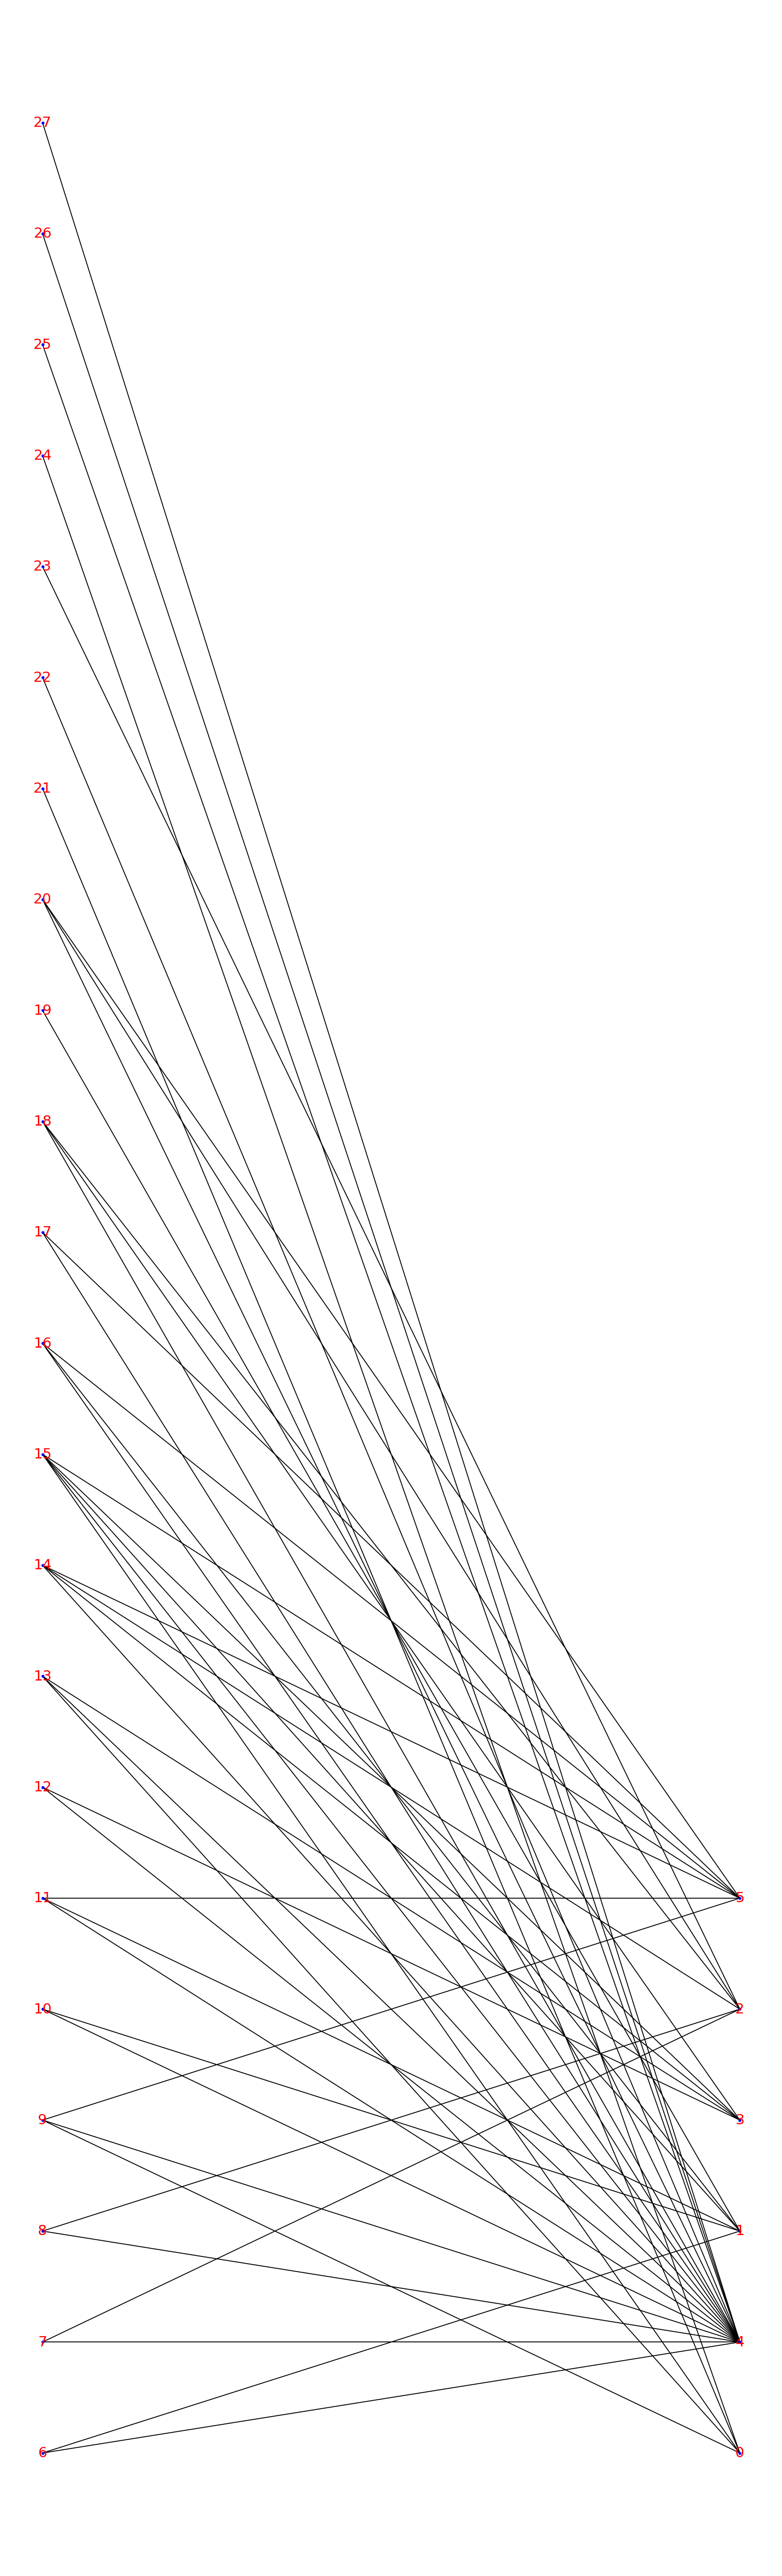

In [56]:
l, r = nx.bipartite.sets(B)
pos = {}

# Update position for node from each group
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))

plt.figure(3,figsize=(12,40)) 
nx.draw(B,pos, node_color='b', node_size=8, withlabels = True)
nx.draw_networkx_labels(B,pos,labels,font_size=16,font_color='r')

plt.show()

In [57]:
bottom_nodes, top_nodes = bipartite.sets(B)
print("First group:", bottom_nodes)
print("Second group:", top_nodes)

First group: {6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27}
Second group: {'0', '4', '1', '3', '2', '5'}


In [58]:
G_top = bipartite.projected_graph(B, top_nodes)
G_bottom = bipartite.projected_graph(B, bottom_nodes)

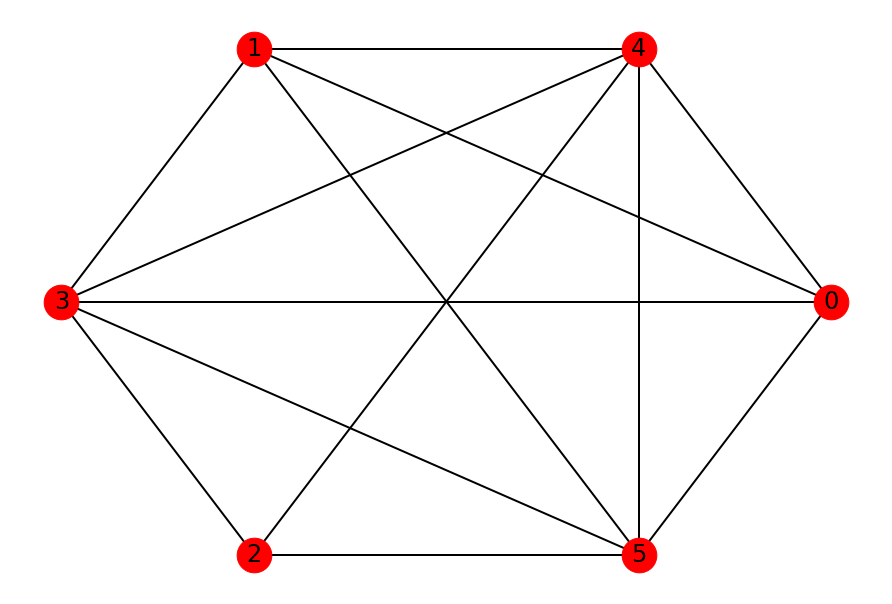

In [59]:
nx.draw_circular(G_top, with_labels=True, node_color='red')

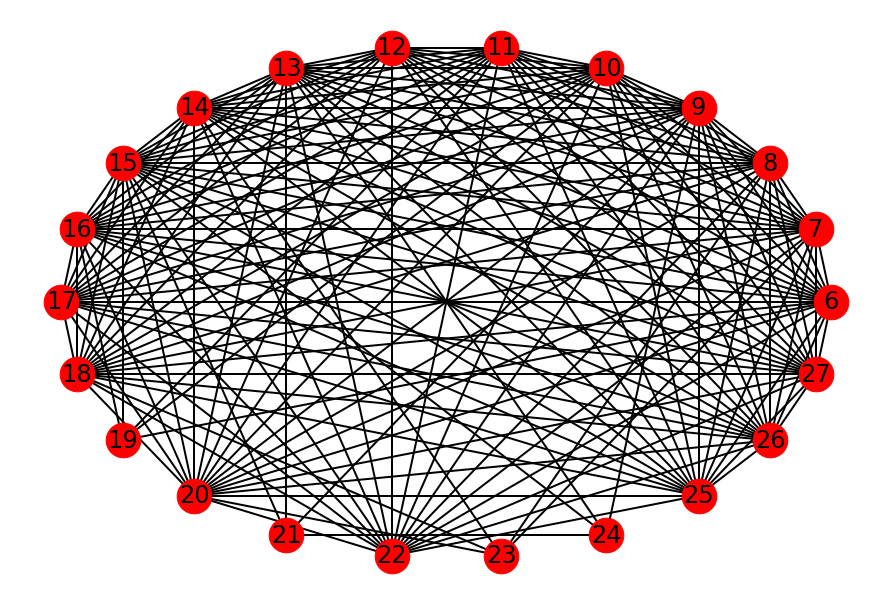

In [60]:
nx.draw_circular(G_bottom, with_labels=True, node_color='red')

In [61]:
node_centrality = nx.betweenness_centrality(B)
edge_centrality = nx.edge_betweenness_centrality(B)

In [62]:
{k: v for k, v in sorted(node_centrality.items(), key=lambda item: item[1])}

{19: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 17: 0.004072470739137406,
 12: 0.0063650341428119215,
 6: 0.015107937330159554,
 10: 0.015107937330159554,
 7: 0.01745064740233822,
 8: 0.01745064740233822,
 11: 0.025030936142047253,
 16: 0.025030936142047253,
 20: 0.0316757852989737,
 18: 0.031888124400201695,
 '3': 0.03530144931111115,
 14: 0.050124682974924534,
 13: 0.05592156099402476,
 9: 0.056420444826241936,
 '5': 0.06644314711947563,
 '2': 0.09141475808142477,
 '1': 0.09738841405508071,
 15: 0.13553234205408118,
 '0': 0.15122120677676237,
 '4': 0.660795127220248}

In [94]:
#inspect clusters of text
df_sorted[df_sorted['name_id'] == 4]

,Speaker,Text,Act,name_id,cluster id,confidence,tuple_edges
111,teacher,they are related,delete message,4,6,0.993950,"(6, 4)"
103,teacher,resilient,delete message,4,7,0.993950,"(7, 4)"
106,teacher,family,delete message,4,8,0.993950,"(8, 4)"
279,teacher,slothful because stanley wasnt able to dig a h...,move message,4,9,0.993950,"(9, 4)"
92,teacher,slothful because stanley wasnt able to dig a h...,move message,4,9,0.993950,"(9, 4)"
91,teacher,slothful because stanley wasnt able to dig a h...,pin message,4,9,0.993950,"(9, 4)"
133,teacher,elya is stanley great-great-grandfather and al...,move message,4,10,0.993950,"(10, 4)"
132,teacher,elya is stanley great-great-grandfather and al...,pin message,4,10,0.993950,"(10, 4)"
302,teacher,elya is stanley great-great-grandfather and al...,move message,4,10,0.993950,"(10, 4)"
301,teacher,stanley is independent beacuse because he carr...,move message,4,11,0.993763,"(11, 4)"


In [95]:
#inspect clusters of text
df_sorted[df_sorted['name_id'] == 0]

,Speaker,Text,Act,name_id,cluster id,confidence,tuple_edges
323,noedgeo,slothful because stanley wasnt able to dig a h...,move message,0,9,0.993950,"(9, 0)"
351,noedgeo,slothful because stanley wasnt able to dig a h...,move message,0,9,0.993950,"(9, 0)"
56,noedgeo,slothful because stanley wasnt able to dig a h...,move message,0,9,0.993950,"(9, 0)"
48,noedgeo,slothful because stanley wasnt able to dig a h...,edit message,0,9,0.993950,"(9, 0)"
54,noedgeo,slothful because stanley wasnt able to dig a h...,pin message,0,9,0.993950,"(9, 0)"
293,noedgeo,stanley on they other hand is determined to di...,create message,0,13,0.991932,"(13, 0)"
347,noedgeo,adaptable because stanley continued to dig the...,move message,0,15,0.993931,"(15, 0)"
314,noedgeo,adaptable because stanley continued to dig the...,move message,0,15,0.993931,"(15, 0)"
312,noedgeo,adaptable because stanley continued to dig the...,move message,0,15,0.993931,"(15, 0)"
310,noedgeo,adaptable because stanley continued to dig the...,move message,0,15,0.993931,"(15, 0)"


In [97]:
#inspect clusters of text
df_sorted[df_sorted['cluster id'] == 15]

,Speaker,Text,Act,name_id,cluster id,confidence,tuple_edges
347,noedgeo,adaptable because stanley continued to dig the...,move message,0,15,0.993931,"(15, 0)"
169,szjg,adaptable because stanley continued to dig the...,pin message,5,15,0.993931,"(15, 5)"
170,szjg,adaptable because stanley continued to dig the...,move message,5,15,0.993931,"(15, 5)"
266,szjg,adaptable because stanley continued to dig the...,move message,5,15,0.993931,"(15, 5)"
267,szjg,adaptable because stanley continued to dig the...,move message,5,15,0.993931,"(15, 5)"
314,noedgeo,adaptable because stanley continued to dig the...,move message,0,15,0.993931,"(15, 0)"
312,noedgeo,adaptable because stanley continued to dig the...,move message,0,15,0.993931,"(15, 0)"
273,teacher,adaptable because stanley continued to dig the...,move message,4,15,0.993931,"(15, 4)"
310,noedgeo,adaptable because stanley continued to dig the...,move message,0,15,0.993931,"(15, 0)"
200,fel group 3,adaptable because stanley continued to dig the...,pin message,1,15,0.993931,"(15, 1)"


Number of nodes:  28
Number of edges:  47
Edge list:
 [(6, '1'), (6, '4'), (7, '2'), (7, '4'), (8, '2'), (8, '4'), (9, '5'), (9, '4'), (9, '0'), (10, '1'), (10, '4'), (11, '1'), (11, '4'), (11, '5'), (12, '3'), (12, '4'), (13, '3'), (13, '0'), (13, '4'), (14, '3'), (14, '4'), (14, '2'), (14, '5'), (15, '0'), (15, '5'), (15, '4'), (15, '1'), (15, '3'), (16, '1'), (16, '5'), (16, '4'), (17, '5'), (17, '4'), (18, '3'), (18, '2'), (18, '4'), (19, '1'), (20, '4'), (20, '2'), (20, '5'), (21, '0'), (22, '4'), (23, '2'), (24, '0'), (25, '4'), (26, '4'), (27, '4')] 



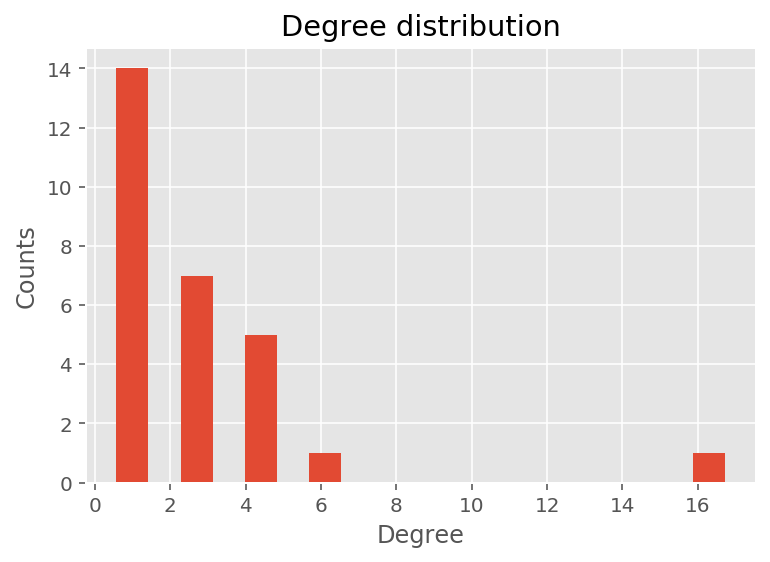

In [72]:
dict(B.degree())
# gives {1: 4, 2: 3, 3: 3, 4: 2, 5: 0, 6: 2}
print("Number of nodes: ", B.number_of_nodes())
# gives Number of nodes:  6
print("Number of edges: ", B.number_of_edges())
# gives Number of edges:  7
print("Edge list:\n", B.edges(), "\n")
# gives Edge list: [(1, 2), (1, 3), (1, 4), (1, 6), (2, 3), (2, 4), (3, 6)]


plt.hist(list(dict(B.degree()).values()),
         bins=10, align='left', rwidth=0.5)
plt.xlabel('Degree')
plt.ylabel('Counts')
plt.title('Degree distribution')
plt.show()

In [73]:
node_centrality = nx.betweenness_centrality(B)
edge_centrality = nx.edge_betweenness_centrality(B)

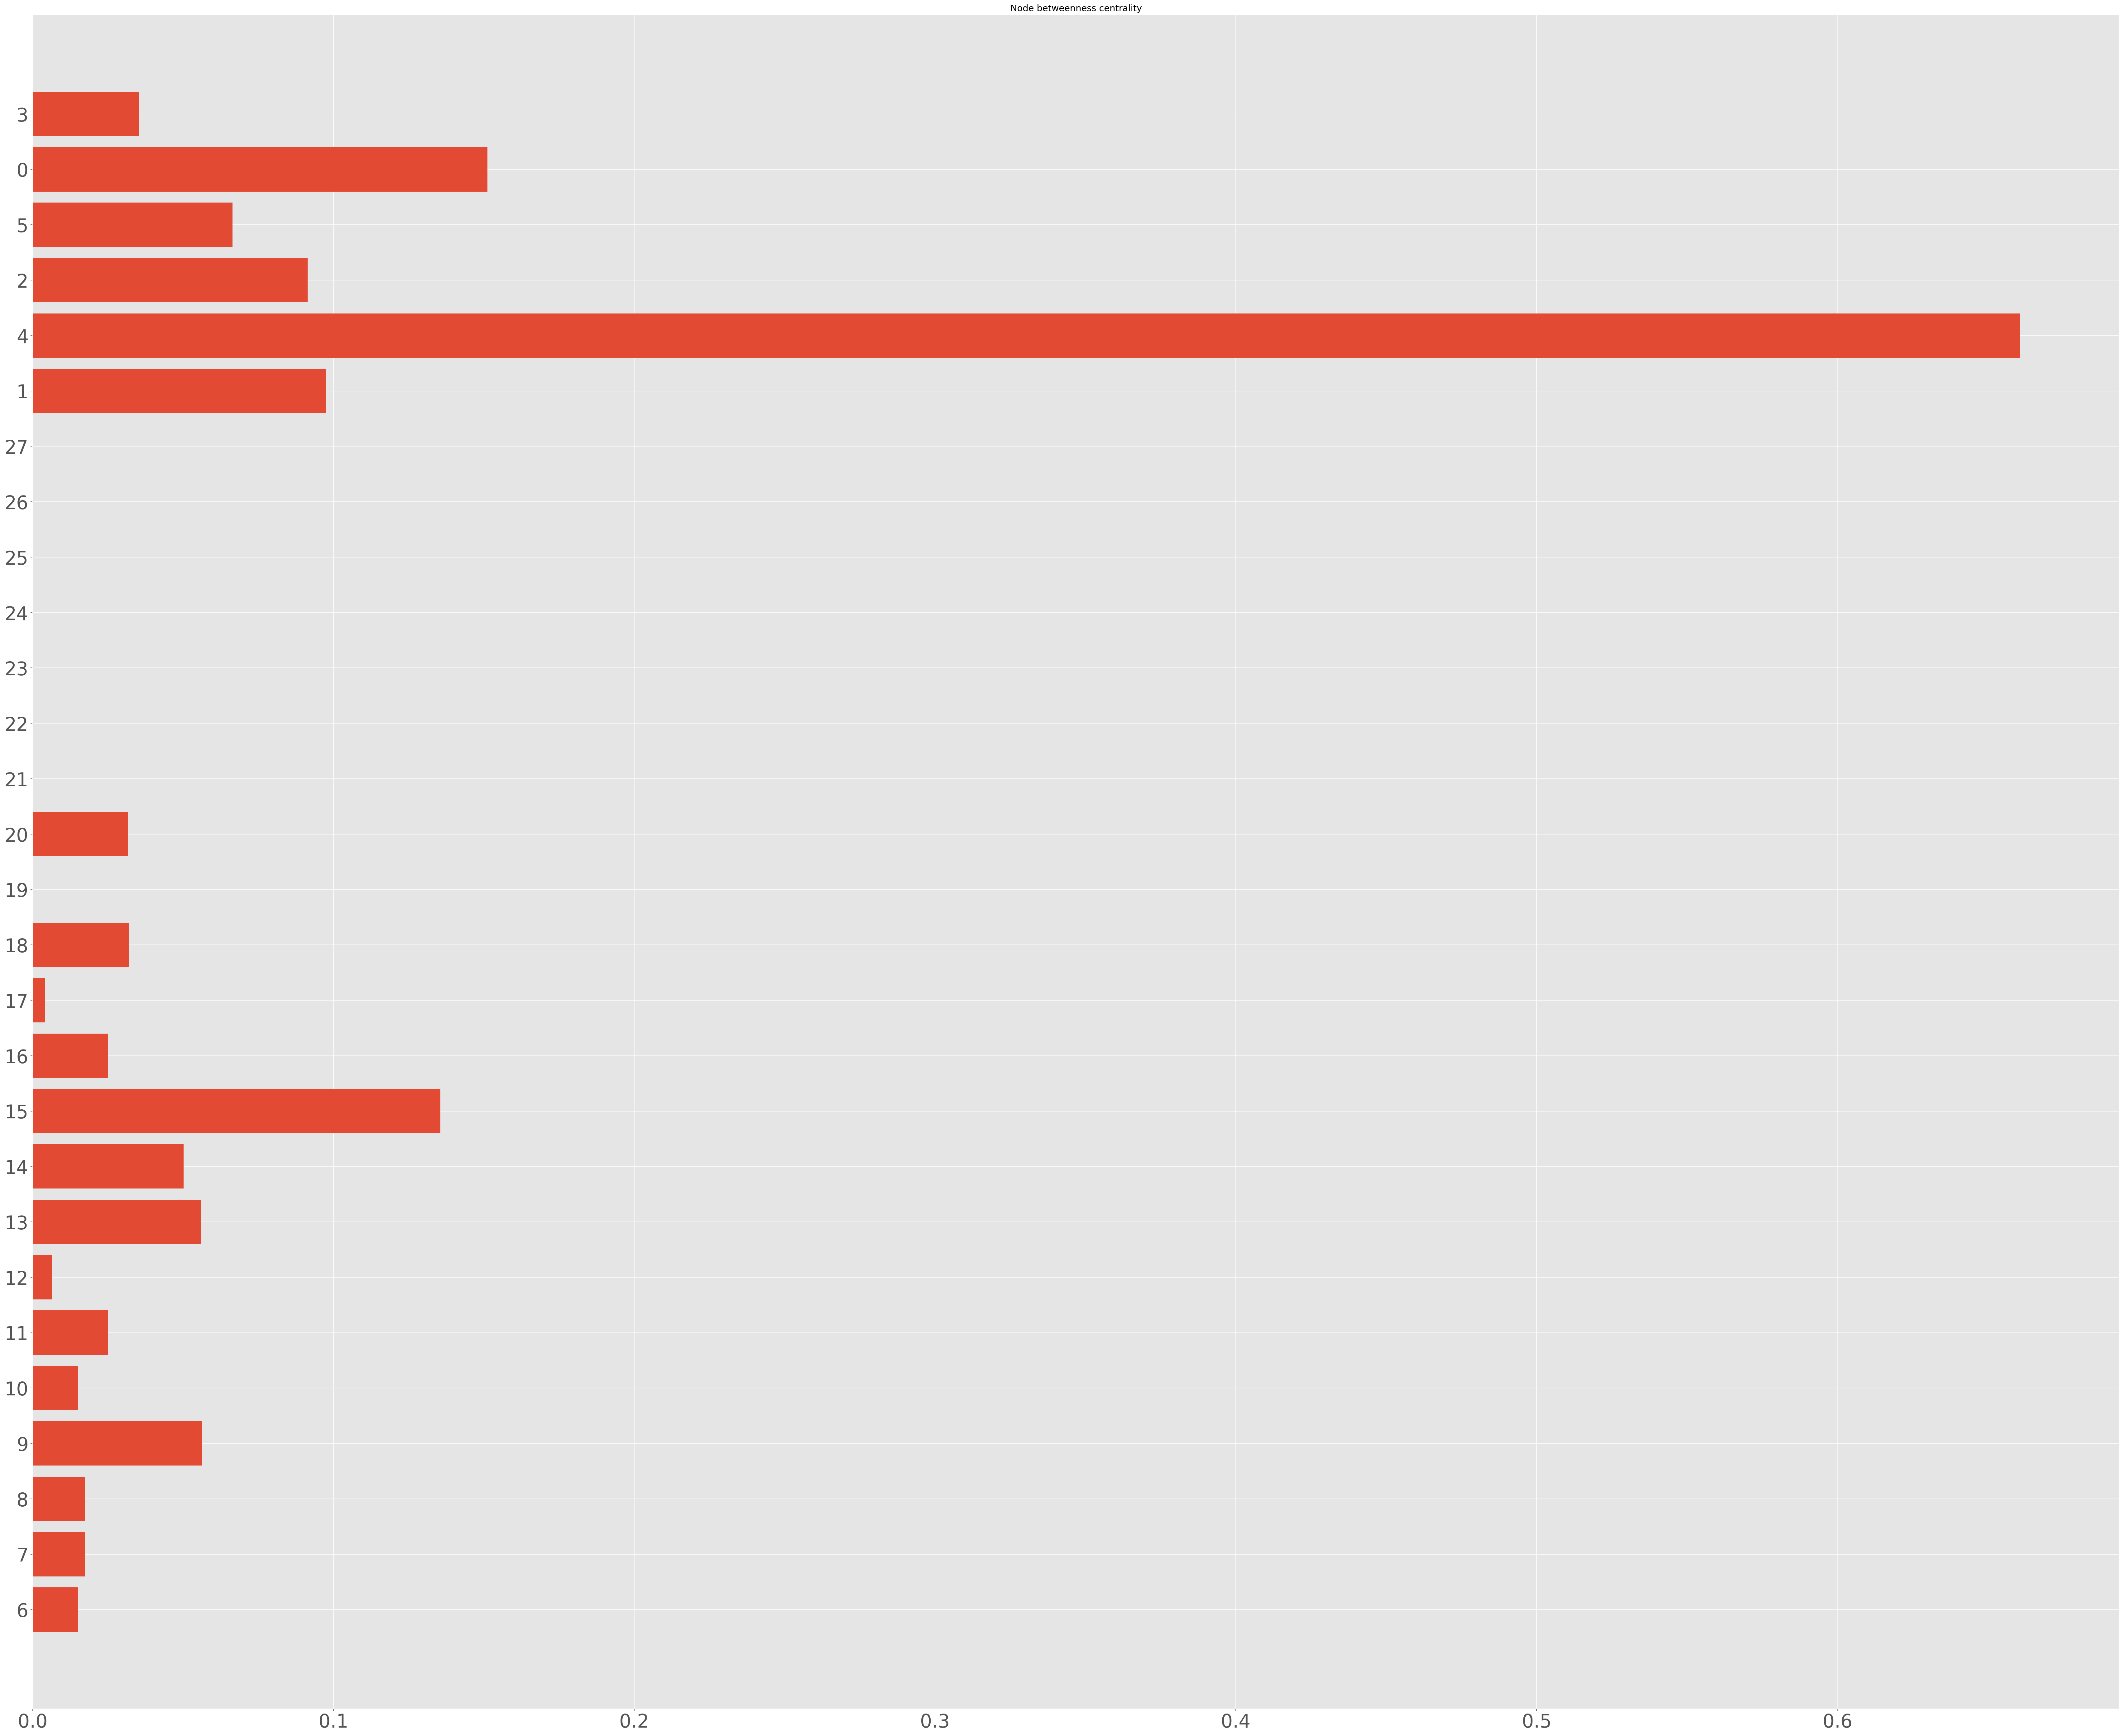

In [74]:
plt.figure(figsize=(60, 50))
plt.barh(list(range(len(list(node_centrality.values())))),
         list(node_centrality.values()))
plt.yticks(list(range(len(node_centrality))), list(node_centrality.keys()), fontsize=30)
plt.xticks(fontsize = 30)
plt.title('Node betweenness centrality')
plt.show()

In [76]:
def plot_communities(B, number_of_clusters=2, seed=1):
    GN_communities = list(nx.community.girvan_newman(B))
    pos = nx.drawing.spring_layout(B, seed=1)
    if number_of_clusters > B.number_of_nodes():
        index = B.number_of_nodes()-2
    else:
        index = number_of_clusters - 2
    G_sub = {}

    label_dict = {}
    for i, nodes in enumerate(GN_communities[index]):
        for node in nodes:
            label_dict[node] = i 
    label_list = [label_dict[node] for node in B.nodes()]

    nx.draw(B, pos=pos, node_color = label_list, cmap='rainbow', with_labels=True)
    
    plt.show()

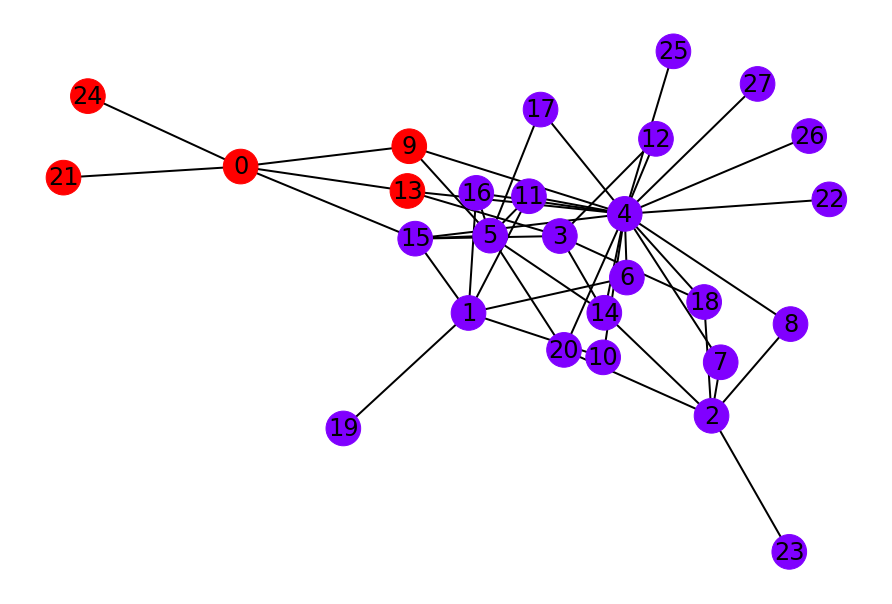

In [78]:
plot_communities(B, number_of_clusters=2)